# Task 1: Machine Learning Algorithms to predict the attrition of Bank Customers

In [1]:
# import the required libraries

import numpy as np # To perform a variety of mathematical operations on arrays
import pandas as pd # To analyze, clean, explore, and manipulate data.
import matplotlib.pyplot as plt # For plotting interactive and interesting charts.
import seaborn as sns # An extension of the matplotlib library for more beautiful graphics.
import sklearn # For performing data modeling such as classification and clustering

In [2]:
# load the dataset

dataset = pd.read_csv('Bank Customer Churn Prediction.csv')

# Exploratory Data Analysis (EDA)

In [3]:
# checks the first 5 rows of the dataset

dataset.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Returns the number of rows and columns

dataset.shape

(10000, 12)

In [5]:
# Provides a brief description of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
# gives a statistical description for the numerical variables in the dataset

dataset.describe(include = 'all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [7]:
# drop 'customer_id' column

dataset.drop(['customer_id'], axis = 1, inplace = True)

In [8]:
# Confirm that the 'customer_id' column has been dropped

dataset.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


C:\Users\USER\AppData\Local\Temp\ipykernel_33472\3165614997.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr() # calculates the correlation matrix for the variables


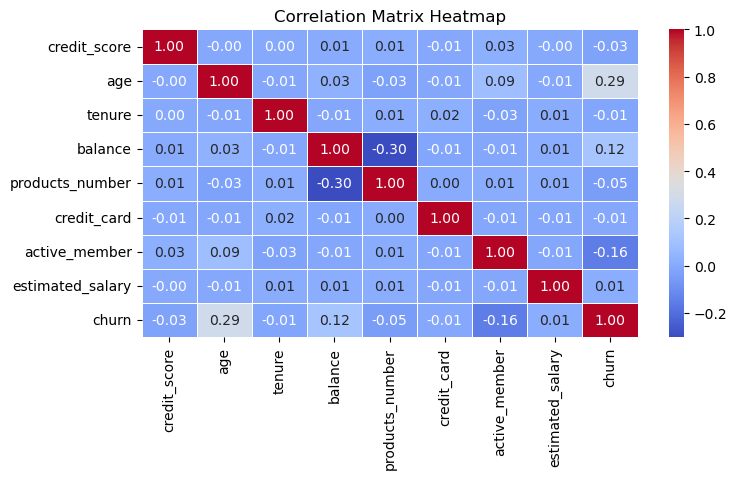

In [9]:
# Visualize the correlation of the variables

corr = dataset.corr() # calculates the correlation matrix for the variables

# plots the correlation matrix heat map for all the variables

plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

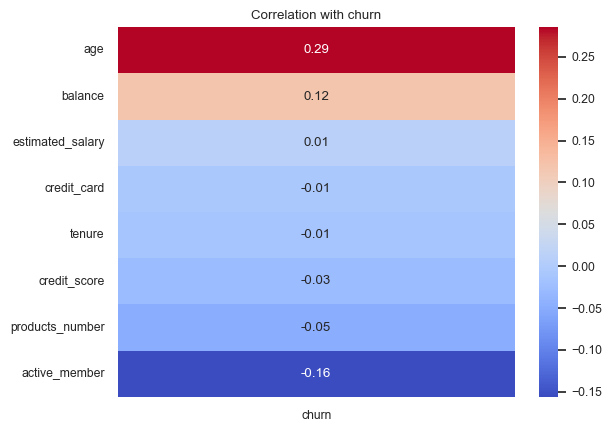

In [10]:
# find the correlation of other variables with the target variable 'churn'

def plot_target_correlation(target_variable, dataset):
    # Calculate the correlation with the target variable
    target_corr = corr[target_variable].drop(target_variable)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Set up the plot
    sns.set(font_scale=0.8)
    sns.set_style("white")
    sns.set_palette("PuBuGn_d")
    
    # Create a heatmap of the correlations with the target column
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {target_variable}')
    plt.show()

# Display the correlaton of 'churn' with other variables
plot_target_correlation('churn', dataset)

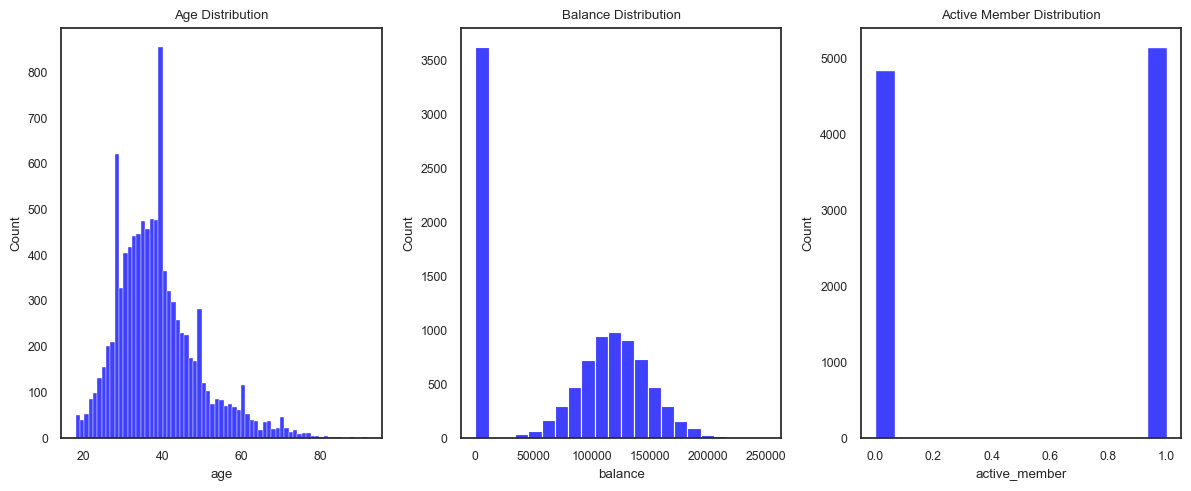

In [11]:
# Visualize the distribution of the most correlated numeric features

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Plot the distribution of 'age' in the first subplot
sns.histplot(dataset['age'], ax=axes[0], color='blue')
axes[0].set_title('Age Distribution')

# Plot the distribution of 'balance' in the second subplot
sns.histplot(dataset['balance'], ax=axes[1], color='blue')
axes[1].set_title('Balance Distribution')


# Plot the distribution of 'active_member' in the third subplot
sns.histplot(dataset['active_member'], ax=axes[2], color='blue')
axes[2].set_title('Active Member Distribution')

plt.tight_layout()
plt.show()

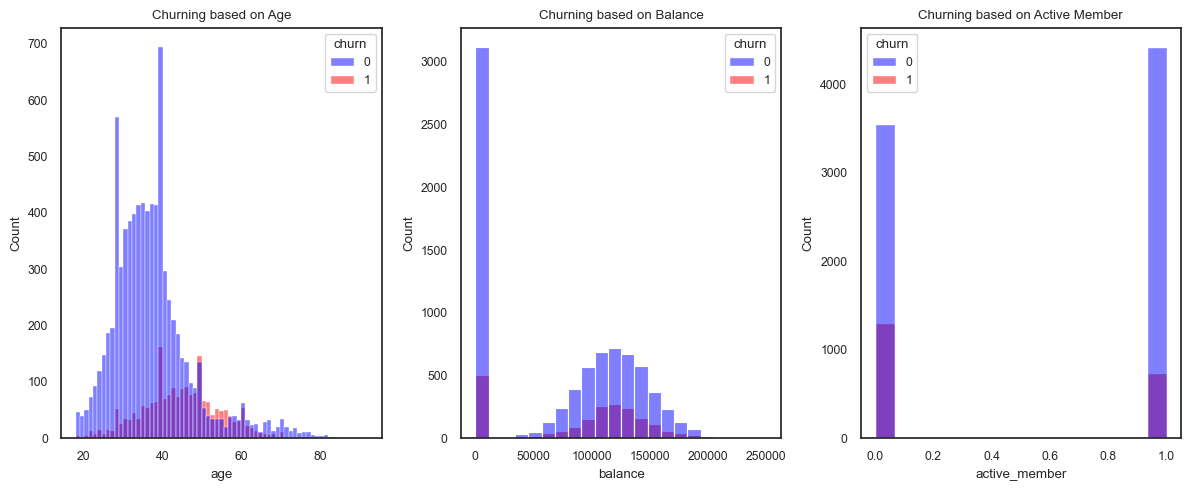

In [12]:
# Visualize the most correlated numeric features by 'churn'

# Create a figure with three subplots

fig, axes = plt.subplots(1, 3, figsize=(12, 5))

# Explore the age distribution by 'churn'
plt.sca(axes[0])
plt.title("Churning based on Age")
sns.histplot(x="age", hue="churn", data=dataset, palette={0: "blue", 1: "red"})

# Explore the balance distribution by 'churn'
plt.sca(axes[1])
plt.title("Churning based on Balance")
sns.histplot(x="balance", hue="churn", data=dataset, palette={0: "blue", 1: "red"})

# Explore the active_member distribution by 'churn'
plt.sca(axes[2])
plt.title("Churning based on Active Member")
sns.histplot(x="active_member", hue="churn", data=dataset, palette={0: "blue", 1: "red"})

plt.tight_layout()
plt.show()

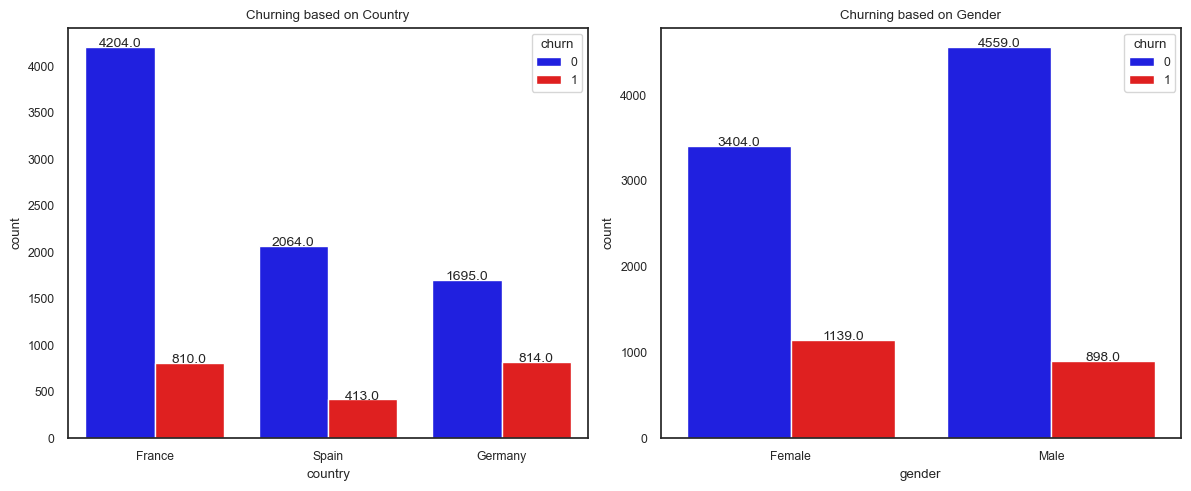

In [13]:
# Explore the categorical features 

# Create subplots in a single figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Explore the country distribution by 'churn'
plt.sca(axes[0])
plt.title("Churning based on Country")
cat_plot = sns.countplot(x="country", hue="churn", data=dataset, palette={0: "blue", 1: "red"})
# Add bar labels
for x in cat_plot.patches:
  cat_plot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), 
              horizontalalignment='center', fontsize = 10)

# Explore the gender distribution by 'churn'
plt.sca(axes[1])
plt.title("Churning based on Gender")
cat_plot = sns.countplot(x="gender", hue="churn", data=dataset, palette={0: "blue", 1: "red"})
# Add bar labels
for x in cat_plot.patches:
  cat_plot.text (x.get_x() + x.get_width()  / 2, x.get_height()+ 0.75, x.get_height(), 
              horizontalalignment='center', fontsize = 10)

plt.tight_layout()
plt.show()

# Data Preprocesssing

In [14]:
# Convert categorical variables to numeric using LabelEncoder

from sklearn.preprocessing import LabelEncoder # import the label encoder class

le=LabelEncoder()
dataset["country"]=le.fit_transform(dataset["country"])
dataset["gender"]=le.fit_transform(dataset["gender"])
dataset.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Check whether the target variable has a balanced class

dataset['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: xlabel='churn', ylabel='count'>

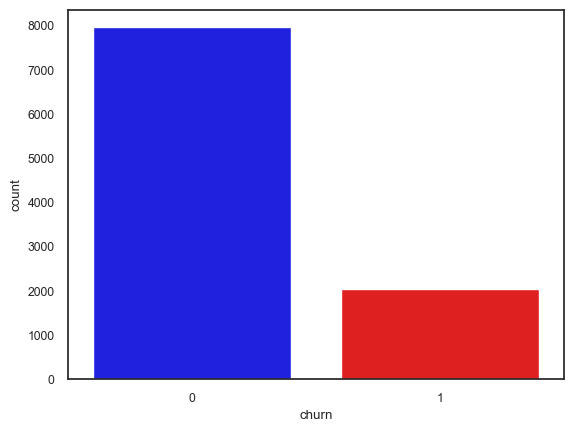

In [16]:
# Visualize the imbalanced class

sns.countplot(data = dataset, x = 'churn', palette={0: "blue", 1: "red"})

In [17]:
# split the data into training and test datasets, and handle the class imbalance with SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Define the dependent variable (y) and independent variables(X)
X = dataset.drop('churn', axis = 1)
y = dataset['churn']

# Normalize the 'balance' feature
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.2, stratify = y, random_state = 0)

# Apply SMOTE for oversampling to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [18]:
# Confirm that the target variable now has a balanced class in the training data

y_train.value_counts()

1    6370
0    6370
Name: churn, dtype: int64

# Classification Algorithms - K-Nearest Neighbours

In [19]:
# Tune hyperparameters and perform a cross-validation on the training dataset

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define a range of k values to try
k_values = [3, 5, 7, 9, 11]

# Create empty lists to store the results
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    # Calculate the mean of the scores
    mean_score = scores.mean()
    mean_scores.append(mean_score)
    
    print(f"Mean Score for k={k}: {mean_score:.2f}")

Mean Score for k=3: 0.86
Mean Score for k=5: 0.84
Mean Score for k=7: 0.83
Mean Score for k=9: 0.81
Mean Score for k=11: 0.80


In [20]:
# fit the KNN to the training set with the value of k that has the highest mean cv score

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p=2)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
# predict the test set result

KNN_y_pred = KNN.predict(X_test)
print(KNN_y_pred)

[0 0 0 ... 0 1 0]


Accuracy:0.74


----------------------------------------------


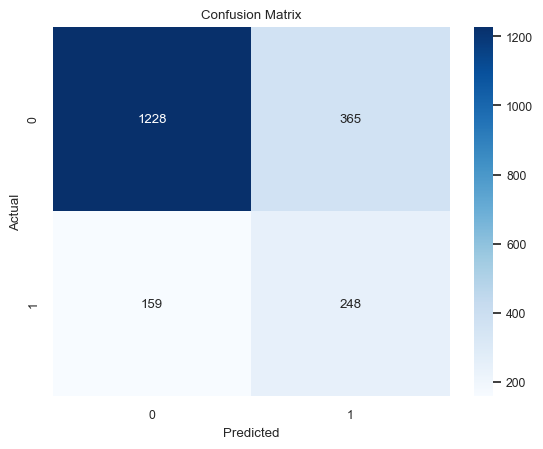

----------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1593
           1       0.40      0.61      0.49       407

    accuracy                           0.74      2000
   macro avg       0.64      0.69      0.66      2000
weighted avg       0.79      0.74      0.76      2000



In [22]:
# Evaluate the model performance

from sklearn import metrics # imports metrics

# Calculates the accuracy score for the model
acc = metrics.accuracy_score(y_test, KNN_y_pred)
print('Accuracy:%.2f\n\n'%(acc))

print('----------------------------------------------')

# Calulates the confusion matrix for the model performance
cm = metrics.confusion_matrix(y_test, KNN_y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()

print('----------------------------------------------')

# Generates a classification report for the model
result=metrics.classification_report(y_test,KNN_y_pred)
print('Classification Report:\n')
print(result)

# Classification Algorithm - Random Forest

In [23]:
# Hyperparameter tuning and cross validation(Grid Search)

# Define a function to print the best parameters after cross-validation
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

# Import Grid Search cross-validation
from sklearn.model_selection import GridSearchCV 

# Perform 5-fold cross-validation
cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 20, 'n_estimators': 100}

0.727 (+/-0.024) for {'max_depth': 2, 'n_estimators': 5}
0.77 (+/-0.04) for {'max_depth': 2, 'n_estimators': 50}
0.774 (+/-0.032) for {'max_depth': 2, 'n_estimators': 100}
0.841 (+/-0.062) for {'max_depth': 10, 'n_estimators': 5}
0.856 (+/-0.069) for {'max_depth': 10, 'n_estimators': 50}
0.856 (+/-0.069) for {'max_depth': 10, 'n_estimators': 100}
0.868 (+/-0.059) for {'max_depth': 20, 'n_estimators': 5}
0.898 (+/-0.065) for {'max_depth': 20, 'n_estimators': 50}
0.899 (+/-0.07) for {'max_depth': 20, 'n_estimators': 100}
0.867 (+/-0.058) for {'max_depth': None, 'n_estimators': 5}
0.897 (+/-0.069) for {'max_depth': None, 'n_estimators': 50}
0.899 (+/-0.07) for {'max_depth': None, 'n_estimators': 100}


In [24]:
# fit the model with the best parameters on the dataset

rf = RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=20)

In [25]:
# predict the test set result

rf_y_pred = rf.predict(X_test)
print(rf_y_pred)

[0 0 0 ... 0 1 0]


Accuracy:0.84


----------------------------------------------


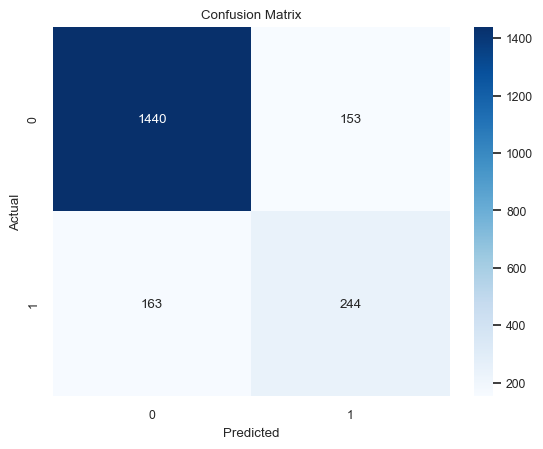

----------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1593
           1       0.61      0.60      0.61       407

    accuracy                           0.84      2000
   macro avg       0.76      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000



In [26]:
# Evaluate the random forest model performance

# Calculates the accuracy score for the model
acc = metrics.accuracy_score(y_test, rf_y_pred)
print('Accuracy:%.2f\n\n'%(acc))

print('----------------------------------------------')

# Calulates the confusion matrix for the model performance
cm = metrics.confusion_matrix(y_test, rf_y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()

print('----------------------------------------------')

# Generates a classification report for the model
result=metrics.classification_report(y_test,rf_y_pred)
print('Classification Report:\n')
print(result)